# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

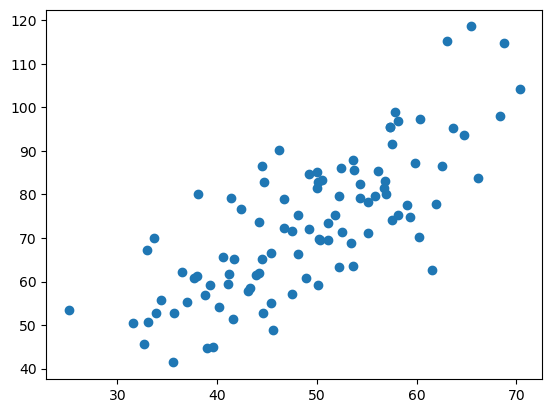

In [35]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [36]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        gradient =  - 2 * inv_N * np.dot(X.T, y - y_hat)
        gradient_norm = np.linalg.norm(gradient)
        
        # print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            print("Stopped at epoch ",e)
            break
            
        #4) Update weights
        weights = weights - alpha * gradient
        if e == epochs-1:
            print('Warning: Maximum number of epochs reached')
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights
    

Now, test your implementation:

In [37]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Stopped at epoch  23


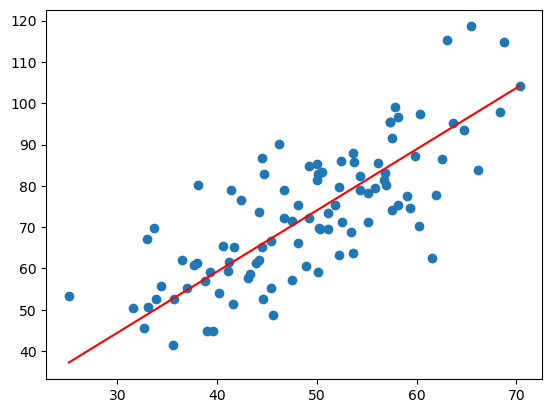

In [38]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

##### Step 3 - Stopping criterion
In an ideal setting, we would like to stop the algorithm when the gradient reaches zero. However, to avoid too long computations, we need to set a threshold that will stop the algorithm when the gradient is close enough to zero. In this case, we set the threshold to be epsilon.
##### Step 5 - Update previous gradient
Since we need to compute every time the difference between the current gradient and the previous gradient to check for the stopping criterion (step 3), we need to keep track of the previous gradient norm. This is what is done in step 5 (prev_gradient = gradient_norm).

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

In [39]:
import math
inv_N = float(1/len(X))
loss_list = []
for alpha in [0.00001, 0.0001, 0.001]:
    for epochs in [100, 1000, 10000]:
        for epsilon in [0.00001, 0.0001, 0.001]:
            weights = gradient_descent(alpha, epochs, epsilon, X, y)
            y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
            # Compute squared loss function
            loss = inv_N * np.sum((y - y_hat)**2)
            
            #append only if loss different from NaN, otherwise it will be considered as min
            if not math.isnan(float(loss)):
                loss_list.append((loss, alpha, epochs, epsilon))
            print('alpha:', alpha, 'epochs:', epochs, 'epsilon:', epsilon)
            print('Loss function: ', loss)
print("Minimal loss", min(loss_list))
    

alpha: 1e-05 epochs: 100 epsilon: 1e-05
Loss function:  111.25056079777495
alpha: 1e-05 epochs: 100 epsilon: 0.0001
Loss function:  111.25056079777495
alpha: 1e-05 epochs: 100 epsilon: 0.001
Loss function:  111.25056079777495
Stopped at epoch  261
alpha: 1e-05 epochs: 1000 epsilon: 1e-05
Loss function:  111.06205432442243
Stopped at epoch  238
alpha: 1e-05 epochs: 1000 epsilon: 0.0001
Loss function:  111.0621760313399
Stopped at epoch  216
alpha: 1e-05 epochs: 1000 epsilon: 0.001
Loss function:  111.06229344553174
Stopped at epoch  261
alpha: 1e-05 epochs: 10000 epsilon: 1e-05
Loss function:  111.06205432442243
Stopped at epoch  238
alpha: 1e-05 epochs: 10000 epsilon: 0.0001
Loss function:  111.0621760313399
Stopped at epoch  216
alpha: 1e-05 epochs: 10000 epsilon: 0.001
Loss function:  111.06229344553174
Stopped at epoch  23
alpha: 0.0001 epochs: 100 epsilon: 1e-05
Loss function:  111.06221819219503
Stopped at epoch  20
alpha: 0.0001 epochs: 100 epsilon: 0.0001
Loss function:  111.062

C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:40: RuntimeWarning: invalid value encountered in subtract
  weights = weights - alpha * gradient
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:40: RuntimeWarning: invalid value encountered in subtract
  weights = weights - alpha * gradient
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:40: RuntimeWarning: invalid value encountered in subtract
  we

alpha: 0.001 epochs: 10000 epsilon: 0.0001
Loss function:  nan
alpha: 0.001 epochs: 10000 epsilon: 0.001
Loss function:  nan
Minimal loss (111.06205432442243, 1e-05, 1000, 1e-05)


C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\ertwi\AppData\Local\Temp\ipykernel_14188\1957368773.py:40: RuntimeWarning: invalid value encountered in subtract
  weights = weights - alpha * gradient


#### Hyper-parameters analysis
We tried to train the LR using gradient descent changing different values of `epochs`, `alpha` and `epsilon` and then we computed the loss function we want to minimize (sum of squares) to see how they fit our training data (we are not using evaluation to evaluate goodness of our model, we want to see just how well our model fit our training data as hyper-params vary). We can see that solutions may have different losses as we vary the hyper-parameters. We found out two main things:
- Epochs: if the epochs number is low (e.g. 100) as well as the epsilon value, our iterative algorithm stops because of exceeded epochs number rather than because of the epsilon threshold
- Learning rate (alpha): if we set an high learning rate, then the algorithm diverges, with gradient becoming higher after each iteration, leading to overflow.
- Stopping criterion (epsilon): in this case it's not very severe, but in general, we may say that chosing an high epsilon may lead to a solution too far from the optimum

According to our experiments, the best result is achieved with (alpha=0.00001, epochs=1000, epsilon=0.00001), with loss = 111.06205432442243.

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [40]:
# Linear regression implementation:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
        # solves the matrix system equations
    
    def predict(self,x_test) : # method of the object that can be used
        self.y_hat= np.dot(x_test,self.weights)
        
        return self.y_hat
    
# Comparison between gradient descent and closed form solution
inv_N = float(1/len(X))
## Gradient descent solution:
### We use the hyper-parameters that appeared to be best in the previous exercise
### Compute gradient descent solution and predictions
weights = gradient_descent(0.00001, 1000, 0.00001, X, y)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
### Compute squared loss function
loss = inv_N * np.sum((y - y_hat)**2)

## Closed form solution:
### Compute closed form solution and predictions
lr = my_linear_regression()
lr.fit(PolynomialFeatures(1).fit_transform(X),y)
y_hat_closed = lr.predict(PolynomialFeatures(1).fit_transform(X))
### Compute squared loss function
loss_closed = inv_N * np.sum((y - y_hat_closed)**2)
weights_n = weights / np.linalg.norm(weights)
lr_weights_n = lr.weights / np.linalg.norm(lr.weights)
# Find if the two vectors differ only by a scalar
print('Normalized weights of gradient descent: ', weights_n)
print('Normalized weights of closed form solution: ', lr_weights_n)

print('Loss function with gradient descent: ', loss)
print('Loss function with closed form solution: ', loss_closed)
print('Difference between the two weights: ', np.linalg.norm(weights - lr.weights))
print('Difference between the two solutions: ', loss - loss_closed)

Stopped at epoch  261
Normalized weights of gradient descent:  [[0.02088449]
 [0.9997819 ]]
Normalized weights of closed form solution:  [[0.99166536]
 [0.12884029]]
Loss function with gradient descent:  111.06205432442243
Loss function with closed form solution:  107.47043700950907
Difference between the two weights:  9.879567379135969
Difference between the two solutions:  3.591617314913364


### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

As we expected, since the closed form solution is the analytical solution of the problem, it is the best solution we can find. In fact, the loss function is minimized with the closed form solution, with loss = 107.47043700950907, while, the gradient descent solution has a loss = 111.06205432442243, which is close to the closed form solution, but not as good as it.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.

In [41]:
def gradient_descent(alpha, epochs, epsilon, X, y, type = 'batch', mini_batch_size = 10):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1
    type='batch' - type of gradient descent to use (batch, mini_batch, stochastic)
    mini_batch_size='10' - size of the mini-batch (only used if type='mini_batch')

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        gradient = None
        #2) Estimate the gradient
        if type == "batch":
            gradient =  - 2 * inv_N * np.dot(X.T, y - y_hat)
        elif type == "mini_batch":
            rand_mini_batch = np.random.randint(0, N, mini_batch_size)
            gradient =  - 2 * (1/mini_batch_size) * np.dot(X[rand_mini_batch].T, y[rand_mini_batch] - y_hat[rand_mini_batch])
        elif type == "stochastic":
            rand_sample = np.random.randint(0, N)
            gradient = - 2 * inv_N * np.dot(X[rand_sample].reshape(X[rand_sample].shape[0], 1), y[rand_sample].reshape(y[rand_sample].shape[0], 1) - y_hat[rand_sample].reshape(y_hat[rand_sample].shape[0], 1))
        gradient_norm = np.linalg.norm(gradient)
        
        # print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            print("Stopped at epoch ",e)
            break
            
        #4) Update weights
        weights = weights - alpha * gradient
        if e == epochs-1:
            print('Warning: Maximum number of epochs reached')
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights

Loss function: 111.05492684500231


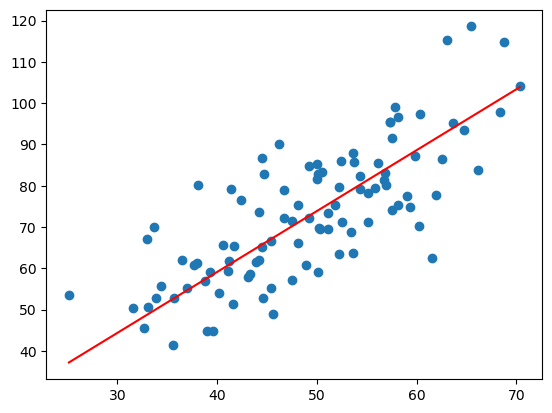

In [42]:
# Testing our implementations - mini_batch
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
inv_N = float(1/len(X))
weights = gradient_descent(alpha, epochs, 0.00001, X, y, type = 'mini_batch', mini_batch_size = 10)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X), weights)
print("Loss function:", inv_N * np.sum((y - y_hat)**2))
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red')  # predicted
plt.show()

Loss function: 111.21134404366178


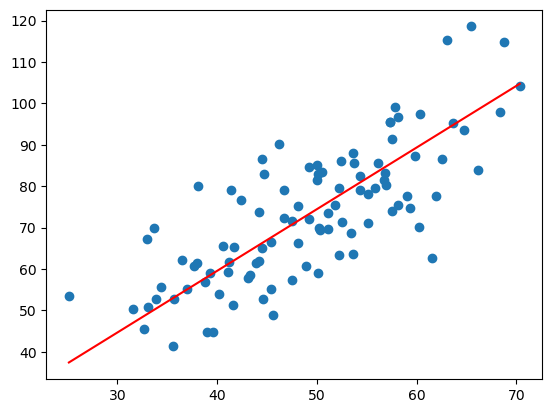

In [43]:
# Testing our implementations - stochastic
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
inv_N = float(1/len(X))
weights = gradient_descent(alpha, epochs, 0.00001, X, y, type = 'stochastic')
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X), weights)
print("Loss function:", inv_N * np.sum((y - y_hat)**2))
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red')  # predicted
plt.show()